# Problem 3
**import libraries**

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import seaborn as sns

**load the data**

In [4]:
df=pd.read_parquet(r"C:\Users\Barry\Desktop\projects\akaike assignment\Structured_Data_Assignment\Structured_Data_Assignment\Structuredata_assignment\train.parquet")

In [5]:
df.head(3)

Patient-Uid       Date           Incident
0  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2019-03-09  PRIMARY_DIAGNOSIS
1  a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-05-16  PRIMARY_DIAGNOSIS
3  a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f 2018-01-30     SYMPTOM_TYPE_0

In [8]:
# Filter the dataframe to only include rows where the drug is the "Target Drug"
target_drug = df[df['Incident'] == 'TARGET DRUG']

In [75]:
# Create a new column for month
target_drug['Month'] = target_drug['Date'].dt.month
target_drug.reset_index(drop=True)
target_drug.drop(columns='index',inplace=True)

In [34]:
# grouping month and count of target drug in each month
k=target_drug.groupby('Month')['Incident'].count()

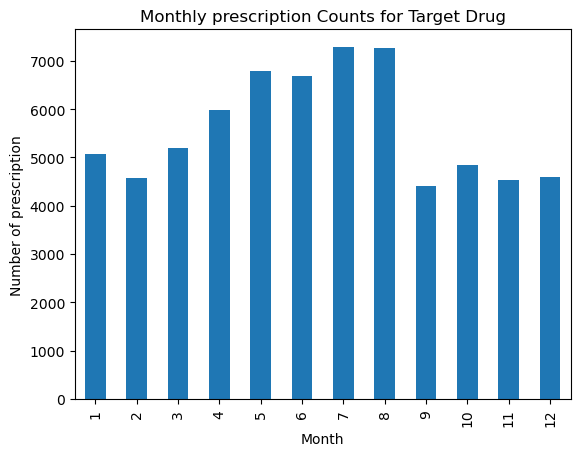

In [51]:
k.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of prescription')
plt.title('Monthly prescription Counts for Target Drug')
plt.show()

In [189]:
# Filter the data to only include rows for the specified patient
hold_data=[]
for i in range(500):
    uid=''.join(target_drug.iloc[i:i+1,0])
    
    patient_data = target_drug[target_drug['Patient-Uid'] == uid]
    
    #Convert the date column to a datetime object
    patient_data['Date'] = pd.to_datetime(patient_data['Date'])

    #Extract the month from the date column
    patient_data['Month'] = patient_data['Date'].dt.month

    # Group the data by month and count the number of incidents
    monthly_incidents = patient_data.groupby('Month')['Incident'].count()
    hold_data.append(monthly_incidents)

In [200]:
prescription_pattern=pd.DataFrame(hold_data)
prescription_pattern.fillna(0,inplace=True)
avg_pre=prescription_pattern.mean()

In [195]:
prescription_pattern.describe()

Month          1           2           3           4           5           6   \
count  499.000000  499.000000  499.000000  499.000000  499.000000  499.000000   
mean     0.893788    0.721443    0.945892    0.955912    1.110220    1.082164   
std      0.842366    0.789337    0.897944    0.982814    0.955788    0.979336   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    2.000000    2.000000   
max      5.000000    5.000000    6.000000    6.000000    6.000000    6.000000   

Month          7           8           9           10          11          12  
count  499.000000  499.000000  499.000000  499.000000  499.000000  499.000000  
mean     1.154309    1.152305    0.821643    0.789579    0.821643    0.723447  
std      1.022948    1.008423    0.872524    0.805236    0.830065    0.823641  
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000  
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000  
75%      2.000000    2.000000    1.000000    1.000000    1.000000    1.000000  
max      6.000000    8.000000    5.000000    5.000000    6.000000    5.000000

In [212]:
prescription_pattern=prescription_pattern[prescription_pattern[8]<6] # removing outlier for better plot

In [213]:
prescription_pattern

Month      1    2    3    4    5    6    7    8    9    10   11   12
Incident  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  1.0
Incident  0.0  1.0  0.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0  0.0  1.0
Incident  0.0  0.0  1.0  0.0  0.0  2.0  2.0  2.0  0.0  1.0  2.0  0.0
Incident  2.0  0.0  2.0  1.0  2.0  1.0  2.0  2.0  1.0  1.0  1.0  1.0
Incident  0.0  1.0  2.0  2.0  0.0  2.0  0.0  1.0  0.0  0.0  0.0  0.0
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
Incident  1.0  0.0  2.0  0.0  2.0  0.0  1.0  0.0  2.0  0.0  1.0  0.0
Incident  0.0  0.0  1.0  0.0  1.0  1.0  1.0  2.0  0.0  1.0  0.0  1.0
Incident  1.0  1.0  1.0  2.0  1.0  2.0  2.0  1.0  2.0  1.0  1.0  1.0
Incident  0.0  1.0  1.0  0.0  2.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0
Incident  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0

[497 rows x 12 columns]

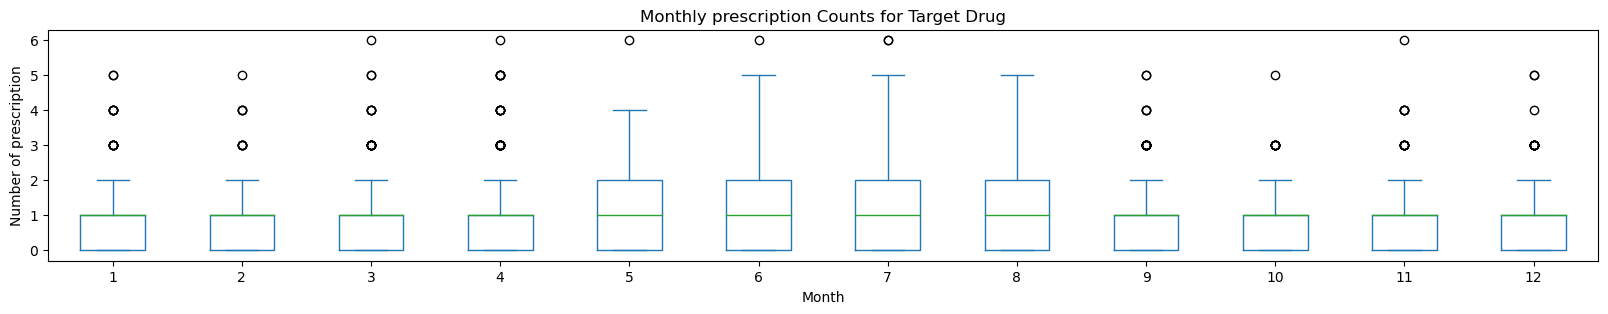

In [214]:
prescription_pattern.plot(kind='box')
plt.xlabel('Month')
plt.ylabel('Number of prescription')
plt.title('Monthly prescription Counts for Target Drug')
plt.show()
